<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/12_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 구글 코랩 환경에서 한글 폰트 설치 및 설정하기
# 아래 코드 실행 후, [런타임] - [세션 다시 시작] 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
# 파이썬 라이브러리 및 모듈 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'  # 기본 폰트 설정
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

In [3]:
# 데이터 생성
np.random.seed(2025)
satisfaction = np.random.normal(7.5, 1.5, 1000)
satisfaction = np.clip(satisfaction, 1, 10)
df1 = pd.DataFrame({'score': satisfaction})

**문제 1**

In [4]:
#1-1
mean_val = df1['score'].mean()
median_val = df1['score'].median()
mode_val = df1['score'].mode()[0]
std_val = df1['score'].std()

print("평균:", mean_val)
print("중앙값:", median_val)
print("최빈값:", mode_val)
print("표준편차:", std_val)

평균: 7.428689549278887
중앙값: 7.421730663868805
최빈값: 10.0
표준편차: 1.3926708008249713


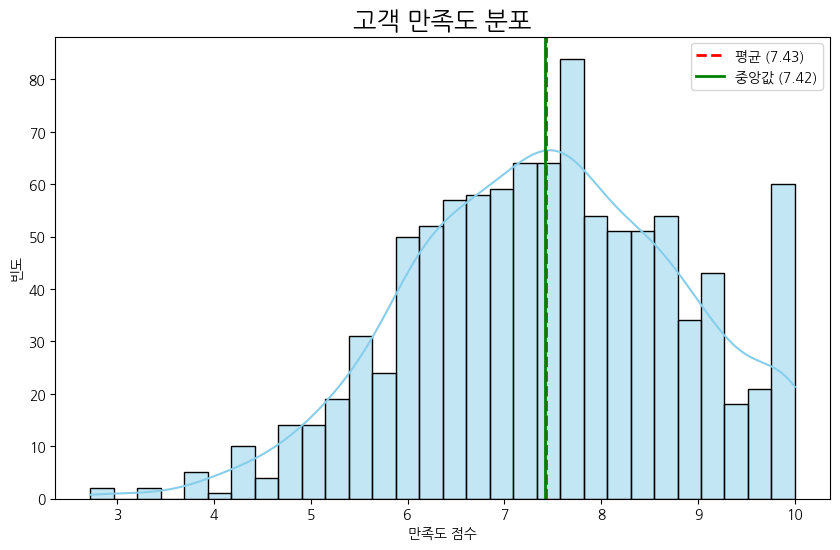

In [5]:
#1-2
plt.figure(figsize=(10,6))
sns.histplot(df1['score'], bins=30, kde=True, color='skyblue')

# 평균, 중앙값 선 표시
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'평균 ({mean_val:.2f})')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'중앙값 ({median_val:.2f})')

plt.title("고객 만족도 분포", fontsize=18)
plt.xlabel("만족도 점수")
plt.ylabel("빈도")
plt.legend()
plt.show()

1-3
VIP 멤버십 프로그램(특별 혜택/우선 응대/전용 이벤트)

리뷰·추천 인센티브 프로그램

**문제 2**

In [6]:
# 데이터 생성
np.random.seed(2025)

# A 지역: 평균 300, 표준편차 50
region_a = np.random.normal(300, 50, 100)

# B 지역: 일반 소득자 + 극단적인 고소득자 포함
region_b = np.concatenate([
    np.random.normal(280, 40, 95),    # 일반 소득자 95명
    np.random.normal(1500, 200, 5)    # 고소득자 5명
])

df2 = pd.DataFrame({
    'region': ['A'] * 100 + ['B'] * 100,
    'salary': np.concatenate([region_a, region_b])
})

지역별 평균 연봉:
region
A    292.506637
B    347.594909
Name: salary, dtype: float64

지역별 중앙값 연봉:
region
A    294.324483
B    287.347488
Name: salary, dtype: float64


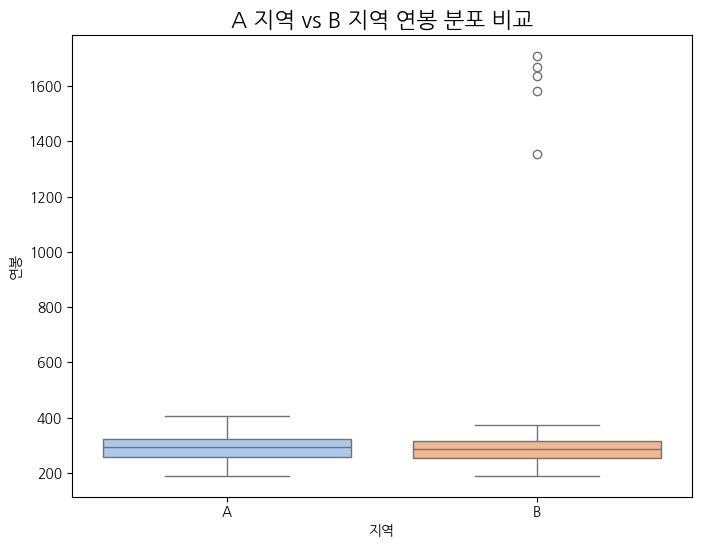

In [7]:
# 평균과 중앙값 계산
mean_vals = df2.groupby('region')['salary'].mean()
median_vals = df2.groupby('region')['salary'].median()

print("지역별 평균 연봉:")
print(mean_vals)
print("\n지역별 중앙값 연봉:")
print(median_vals)

# 박스플롯 시각화
plt.figure(figsize=(8,6))
sns.boxplot(data=df2, x='region', y='salary', palette='pastel')
plt.title("A 지역 vs B 지역 연봉 분포 비교", fontsize=16)
plt.xlabel("지역")
plt.ylabel("연봉")
plt.show()


A 지역과 B 지역의 평균 연봉은 어떻게 다른가요?
>B 지역 평균이 A 지역보다 훨씬 높다. (고소득자 영향)

두 지역의 평균 차이가 의미하는 바는 무엇인가요?
>B 지역의 실제 소득 분포보다 평균이 과대평가되어 있다.

고소득자가 있는 지역의 평균은 어떤 영향을 받을까요?
중앙값은 어떠한가요?
>평균을 크게 끌어올려 실제보다 부유하게 보이게 만든다
>극단값 영향이 적어, B 지역 중앙값은 크게 변하지 않는다.

평균과 비교했을 때, 중앙값이 더 낮거나 높다면 어떤 해석이 가능할까요?
>평균 > 중앙값 → 고소득자 존재,
<평균 < 중앙값 → 저소득자 존재

극단값(고소득자)의 영향은 어디에서 더 크게 나타날까요?
>평균

평균과 중앙값 중 어떤 지표가 극단값에 더 민감한가요?
>평균이 매우 민감하다.

박스플롯을 통해 어떤 점을 관찰할 수 있나요?
>B 지역은 상단에 많은 이상치가 찍혀 비대칭적 분포를 보인다.

이상치(Outlier)는 어떻게 표시되나요?
두 지역의 분포 폭(사분위 범위)은 어떻게 다른가요?
>범위 밖의 점으로 표시된다.

평균만 보고 판단했을 때 생길 수 있는 오해는 무엇인가요?
>B 지역이 더 부유하다고 생각할 수 있다.

어떤 경우에는 중앙값이 더 유용한 지표일 수 있을까요?
>극단값이 많거나 분포가 비대칭일 때


**문제 3. 이상값과 분산 비교**

In [8]:
np.random.seed(2025)  # 재현 가능성을 위해 시드 고정

# 1반: 평균 75, 표준편차 8
class1 = np.random.normal(75, 8, 30)

# 2반: 일반 학생 + 이상값(0점, 130점)
class2 = np.concatenate([
    np.random.normal(75, 15, 28),  # 일반 학생
    [0, 130]                       # 극단적인 이상값
])

df3 = pd.DataFrame({
    'class': ['1반'] * 30 + ['2반'] * 30,
    'score': np.concatenate([class1, class2])
})


In [9]:
mean_vals = df3.groupby('class')['score'].mean()
std_vals = df3.groupby('class')['score'].std()
min_vals = df3.groupby('class')['score'].min()
max_vals = df3.groupby('class')['score'].max()

print("평균:\n", mean_vals)
print("\표준편차:\n", std_vals)
print("\최소값:\n", min_vals)
print("\최대값:\n", max_vals)

평균:
 class
1반    75.724316
2반    73.728848
Name: score, dtype: float64
\표준편차:
 class
1반     7.062710
2반    22.340818
Name: score, dtype: float64
\최소값:
 class
1반    60.685416
2반     0.000000
Name: score, dtype: float64
\최대값:
 class
1반     92.175893
2반    130.000000
Name: score, dtype: float64


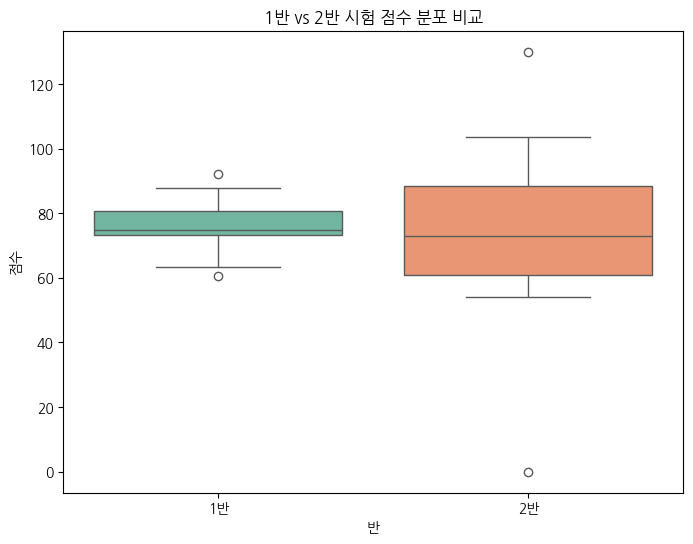

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df3, x='class', y='score', palette='Set2')
plt.title("1반 vs 2반 시험 점수 분포 비교")
plt.xlabel("반")
plt.ylabel("점수")
plt.show()

어떤 반의 점수 분산이 더 크고, 왜 그럴까요?

>2반이 더 크다.
>0점, 130점 같은 극단적 이상값 때문에 점수 퍼짐이 크게 증가한다.

점수 분포의 퍼짐 정도는 어떤 지표로 확인할 수 있을까요?

>표준편차, 분산, 사분위 범위(IQR), 최대–최소 범위.

이상값이 포함되면 표준편차나 범위는 어떻게 달라질까요?

>크게 증가한다. 이상값이 전체 데이터를 넓게 퍼지게 만든다.

이상값이 있는 반의 평균은 어떤 영향을 받았나요?

>평균이 실제보다 낮거나 높게 왜곡된다.

극단적으로 낮거나 높은 점수가 평균을 끌어내리거나 끌어올렸나요?

>0점은 평균을 끌어내리고, 130점은 평균을 끌어올린다.

평균과 중앙값의 차이가 의미하는 바는 무엇인가요?

>차이가 크면 분포가 비대칭이고 이상값의 영향이 크다는 뜻이다.

박스플롯을 통해 이상값은 어떻게 드러나나요?

>수염 밖에 점으로 표시된다.

이상값(outlier)은 박스플롯에서 어떤 형태로 나타나나요?

>일반적으로 동그라미(점) 형태로 나타난다.

두 반의 박스(사분위 범위)는 어떻게 보이나요?

>2반이 더 넓어지거나 치우쳐 보이며, 이상값이 따로 찍힌다.

평균만 보고 평가했을 때 생길 수 있는 오해는 무엇인가요?

>2반 학생들이 실제보다 성적이 낮다고 판단할 수 있다.

교사가 평균 점수만 보고 2반이 부족하다고 판단한다면?

>이상값 영향으로 평균이 왜곡된 것이므로 잘못된 결론을 내릴 수 있다.

중앙값이나 표준편차 같은 지표와 함께 분석하는 것은 왜 중요할까요?

>이상값의 영향을 줄이고 실제 분포를 더 정확히 이해할 수 있기 때문이다.

**문제 4. IQR 이상값 제거**

In [12]:
# 2반 점수만 추출
class2_scores = df3[df3['class'] == '2반']['score']

# IQR 계산
Q1 = class2_scores.quantile(0.25)
Q3 = class2_scores.quantile(0.75)
IQR = Q3 - Q1

# 이상값 기준
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상값 제거
class2_no_outliers = class2_scores[(class2_scores >= lower_bound) & (class2_scores <= upper_bound)]

# 평균 비교
mean_before = class2_scores.mean()
mean_after = class2_no_outliers.mean()

median_before = class2_scores.median()
median_after = class2_no_outliers.median()

print("이상값 제거 전 평균:", mean_before)
print("이상값 제거 후 평균:", mean_after)

print("\이상값 제거 전 중앙값:", median_before)
print("이상값 제거 후 중앙값:", median_after)


이상값 제거 전 평균: 73.72884842544566
이상값 제거 후 평균: 74.35233759869178
\이상값 제거 전 중앙값: 73.00372633167626
이상값 제거 후 중앙값: 73.00372633167626


이상값 제거 전후 평균은 어떻게 달라졌나요?

> 이상값을 제거하면 평균이 극단값 영향에서 벗어나 더 자연스러운 값으로 변화한다.
> (2반의 경우 0점·130점 제거 후 평균이 실제 학생 수준에 더 가까워진다.)

평균이 중앙값에 가까워졌나요?

> 이상값 제거 후 평균은 중앙값에 더 가까워진다.

이상값 제거가 평균에 어떤 방향으로 영향을 주었나요?

> 평균의 왜곡을 줄여 실제 분포에 더 근접한 값으로 만든다.

왜 IQR을 기준으로 이상값을 판단할까요?

> IQR은 극단값 영향을 거의 받지 않아 비대칭 분포에서도 안정적으로 이상값을 판별할 수 있기 때문이다.

IQR은 데이터를 어떻게 나누고, 어떤 방식으로 이상값을 정의하나요?

> 데이터를 Q1(25%)와 Q3(75%)로 나누고, 중간 50% 범위(IQR)를 계산한다.
> Q1 − 1.5×IQR 아래 또는 Q3 + 1.5×IQR 위의 값을 이상값으로 본다.

평균이나 표준편차 기준과 비교했을 때 어떤 점이 더 강건할까요?

> IQR 방식이 훨씬 강건하다. 평균·표준편차는 이상값에 민감하다.

이상값은 언제 제거하고, 언제 유지해야 할까요?

> 오류나 데이터 입력 실수는 제거해야 한다.
> 실제 의미 있는 특이 현상이라면 유지해야 한다.

분석 목적에 따라 이상값은 중요한 정보가 될 수 있습니다.

> 예: 부정행위 의심, 특별 우수자, 위험 신호 등 특수 집단 탐색에 유용하다.

중앙값과 평균은 각각 어떤 상황에서 더 유용한가요?

> 평균: 분포가 대칭적이고 이상값이 없을 때 유용하다.
> 중앙값: 이상값이 존재하거나 분포가 비대칭일 때 유용하다.

이상값이 있을 때 어떤 지표가 더 신뢰할 수 있나요?

> 중앙값이 더 신뢰할 수 있다.

두 지표를 함께 보면 어떤 장점이 있을까요?

> 평균과 중앙값의 차이를 통해 분포의 왜도, 이상값 존재 여부 등을 한눈에 파악할 수 있다.


**문제 5. 변수 유형 분류**

In [13]:
# 데이터 생성
np.random.seed(2025)
df5 = pd.DataFrame({
    'age': np.random.randint(18, 65, 200),
    'coffee_type': np.random.choice(['아메리카노', '라떼', '카페모카'], 200),
    'size': np.random.choice(['Small', 'Medium', 'Large'], 200),
    'price': np.random.normal(4500, 500, 200),
    'satisfaction': np.random.randint(1, 6, 200)
})

In [14]:
# 1. 데이터 타입 확인
print(df5.dtypes)

# 2. 변수 유형 분류 (직접 출력)
variable_types = {
    'age': '연속형 또는 이산형 (numeric-continuous/discrete)',
    'coffee_type': '범주형 (categorical)',
    'size': '서열형 범주 (ordinal-categorical)',
    'price': '연속형 (numeric-continuous)',
    'satisfaction': '서열형 범주 (ordinal-categorical)'
}

print("\n변수 유형 분류:")
for var, vtype in variable_types.items():
    print(f"{var}: {vtype}")


age               int64
coffee_type      object
size             object
price           float64
satisfaction      int64
dtype: object

변수 유형 분류:
age: 연속형 또는 이산형 (numeric-continuous/discrete)
coffee_type: 범주형 (categorical)
size: 서열형 범주 (ordinal-categorical)
price: 연속형 (numeric-continuous)
satisfaction: 서열형 범주 (ordinal-categorical)



1. 숫자처럼 보이지만 사실은 범주형 또는 서열형으로 해석하는 변수는 무엇일까요?

> `satisfaction` 점수 차이가 실제 차이를 의미하지 않기 때문에 연속형으로 다루면 오류가 생길 수 있다.


2. 변수 유형에 따라 적절한 분석 방법이나 시각화 방식은 어떻게 달라질까요?

> 연속형 → 평균, 분산, 상관분석, 회귀 / 히스토그램·산점도
> 범주형 → 비율, 빈도, 카이제곱 검정 / 막대그래프
> 서열형 → 중앙값·순위 기반 분석, 비모수 검정(Mann–Whitney 등) / 막대그래프, 박스플롯
> 이산형 → 빈도 분석, 포아송 모델 등 / 막대그래프


**문제 6. 상관관계 분석**

In [15]:
# 데이터 생성
np.random.seed(202)

temp = np.random.normal(25, 5, 100)
humidity = np.random.normal(60, 10, 100)
sales = temp * 10 - humidity * 2 + np.random.normal(0, 20, 100) + 200

df6 = pd.DataFrame({'temp': temp, 'humidity': humidity, 'sales': sales})

              temp  humidity     sales
temp      1.000000 -0.115936  0.906593
humidity -0.115936  1.000000 -0.390105
sales     0.906593 -0.390105  1.000000


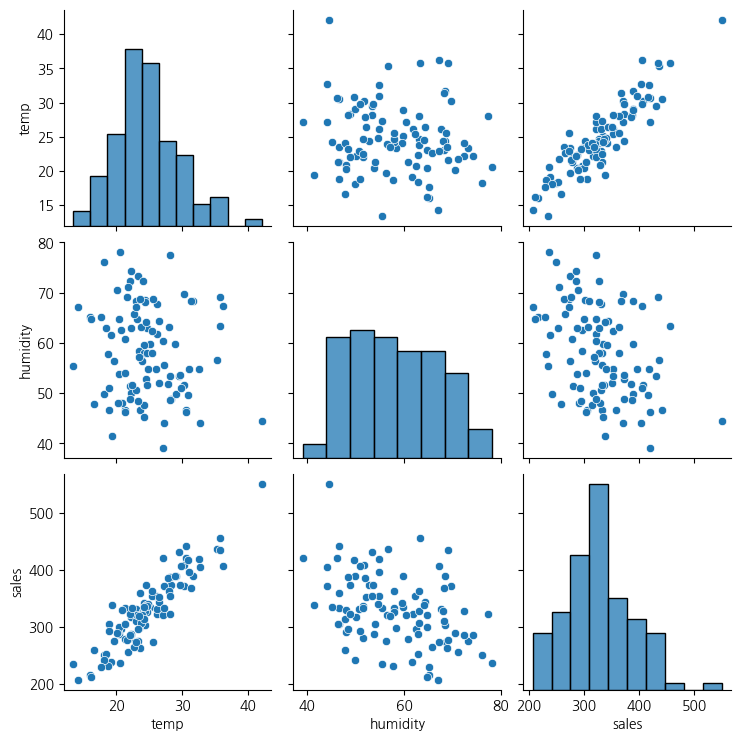

In [16]:
# 1. 상관계수 행렬 출력
print(df6.corr())

# 2. 페어플롯 시각화
sns.pairplot(df6)
plt.show()


어떤 변수와 sales 간의 상관계수가 가장 높은가요?

> `temp`와 `sales`가 가장 높은 양의 상관관계를 가진다.

어느 쌍이 양의 상관관계, 어느 쌍이 음의 상관관계인가요?

> `temp - sales`는 양의 상관관계
> `humidity - sales`는 음의 상관관계
> `temp - humidity`는 약한 음의 상관관계

페어플롯에서 어떤 변수 쌍은 직선 형태로 관계가 보이나요?

> `temp - sales`는 우상향 직선 패턴이 보인다.

어떤 변수 쌍은 분산이 크거나 패턴이 없는가요?

> `humidity - sales`는 어느 정도 패턴이 있지만 분산이 더 크다.
> `temp - humidity`는 뚜렷한 선형 패턴이 거의 없다.

상관관계가 반드시 인과관계를 의미하지는 않습니다.
온도와 매출에 상관관계가 있다고 해서, 온도가 매출을 직접적으로 증가시킨다고 볼 수 있을까요?

> 그렇지 않다. 온도는 단지 관련 요인의 하나일 뿐이고 매출에 영향을 주는 숨겨진 다른 요인(계절, 방문객 수, 날씨 변화 등)이 있을 수 있다.

이 데이터를 바탕으로 어떤 추가 가설이나 실험 설계를 생각해볼 수 있을까요?

> 높은 온도일 때 고객 방문이 증가하는지 확인
> 습도가 높을수록 특정 제품의 구매가 감소하는지 실험
> 다른 환경 요인(비, 바람, 시간대)이 매출에 영향을 주는지 추가 데이터 수집



**문제 7. 범주형 변수 시각화**

In [17]:
# 데이터 생성
df7 = pd.DataFrame({
    'drink': np.random.choice(['아메리카노', '라떼', '콜드브루'], 300)
})

drink
콜드브루     108
아메리카노     97
라떼        95
Name: count, dtype: int64


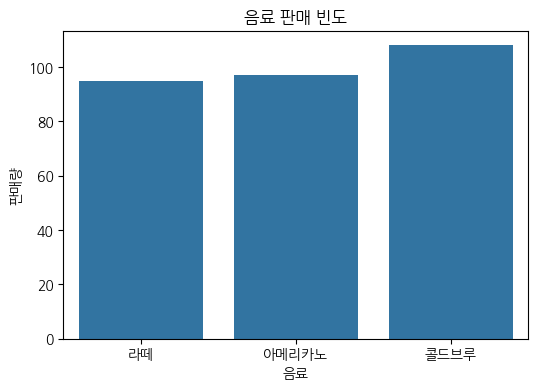

In [18]:
# 1. 빈도표 생성
freq = df7['drink'].value_counts()
print(freq)

# 2. 막대그래프 시각화
plt.figure(figsize=(6,4))
sns.countplot(data=df7, x='drink')
plt.title("음료 판매 빈도")
plt.xlabel("음료")
plt.ylabel("판매량")
plt.show()



1.출력된 빈도표와 막대그래프를 보면, 어떤 음료가 가장 많이 판매되었나요?

> 콜드브루, 아메리카노

2.이 결과는 어떤 마케팅 전략에 활용할 수 있을까요?

가장 많이 팔린 음료를 주력 상품으로 홍보해야 할까요?

> 그렇다. 이미 수요가 높으므로 대표 상품으로 강조하기 좋다.

판매량이 적은 음료를 프로모션 대상으로 삼는 것은 어떨까요?

> 가능하다. 프로모션을 통해 관심을 유도하거나 재고 소진 전략으로 활용할 수 있다.

---

3.막대그래프는 왜 범주형 변수에 적합할까요?

> 각 범주의 개수(빈도)를 직관적으로 비교할 수 있기 때문이다.

drink처럼 종류가 명확히 나뉘는 변수를 분석할 때 어떤 점이 중요한가요?

> 범주의 비율·분포를 파악하는 것이 핵심이다.
> 어떤 항목이 두드러지는지 비교 분석이 쉽다.

4.범주형 변수 분석 시 주의할 점은?

> 범주 수가 너무 많으면 해석이 어려워진다.
> 총 판매량을 함께 고려해야 한다.
> 표본 크기가 적을 때는 왜곡이 발생할 수 있다.



**문제 8. 요일별 평균 비교**

In [19]:
# 데이터 생성
df8 = pd.DataFrame({
    'day': np.random.choice(['월', '화', '수', '목', '금', '토', '일'], 500),
    'amount': np.random.normal(12000, 2000, 500)
})

day
금    11749.975069
목    11983.717259
수    12232.992957
월    11709.243076
일    11502.615277
토    12188.056532
화    11762.882101
Name: amount, dtype: float64


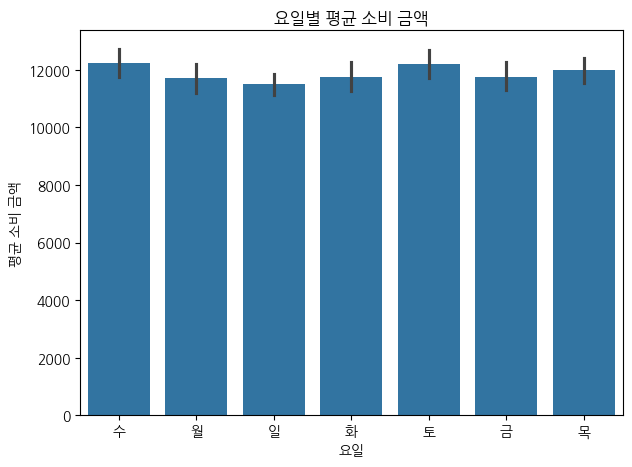

In [20]:
# 1. 요일별 평균 소비 금액 계산
mean_amount = df8.groupby('day')['amount'].mean().sort_index()
print(mean_amount)

# 2. 막대그래프 시각화
plt.figure(figsize=(7,5))
sns.barplot(data=df8, x='day', y='amount', estimator='mean')
plt.title("요일별 평균 소비 금액")
plt.xlabel("요일")
plt.ylabel("평균 소비 금액")
plt.show()


어떤 요일에 소비 금액이 가장 높나요?

> 막대그래프에서 가장 큰 요일이 최고 소비 요일이다. (보통 주말이 높게 나타난다)

주말(토, 일)과 평일(월~금) 중 어떤 쪽의 평균이 더 높은가요?

> 주말이 더 높은 경향이 있다.

소비 금액이 적은 요일은 언제인가요? 왜 그럴까요?

> 월·화처럼 초반 평일이 낮게 나타날 수 있다.
> 지출을 줄이고 일상 리듬을 회복하는 시기이기 때문이다.

이 결과를 어떻게 활용할 수 있을까요?

> 수요가 높은 날은 재고·인력 강화
> 낮은 날은 할인·프로모션으로 소비 유도

주말에 더 많은 재고를 준비하거나 평일에 할인 이벤트를 기획하는 것이 도움이 될까요?

> 그렇다. 요일별 소비 패턴 기반으로 운영·마케팅 전략을 최적화할 수 있다.


**문제 9. 정규분포와 표준편차**

In [21]:
# 데이터 생성
np.random.seed(2025)
scores = np.random.normal(70, 10, 1000)

# 평균과 표준편차
mean = np.mean(scores)
std = np.std(scores)

# ±1σ, ±2σ 범위 계산
within_1sigma = np.mean((scores >= mean - std) & (scores <= mean + std))
within_2sigma = np.mean((scores >= mean - 2*std) & (scores <= mean + 2*std))

print("평균:", mean)
print("표준편차:", std)
print("±1σ 범위 비율:", within_1sigma)
print("±2σ 범위 비율:", within_2sigma)


평균: 69.68478147854127
표준편차: 9.621091086908713
±1σ 범위 비율: 0.687
±2σ 범위 비율: 0.95



±1σ, ±2σ 범위에 실제로 몇 %의 데이터가 포함되었나요?

> ±1σ는 약 68% 근처
> ±2σ는 약 95% 근처

이 결과는 68–95–99 법칙과 얼마나 비슷했나요?

> 거의 동일하게 나타난다.
> 표본 크기가 충분하면 정규분포 특성과 매우 비슷한 비율을 보인다.

표준편차는 왜 중요한 지표인가요?

> 데이터가 평균 주변에 얼마나 퍼져 있는지 알려주는 핵심 지표이기 때문이다.
> 변동성, 위험도, 일관성을 판단할 때 필수적으로 사용된다.

이 개념이 실제로 어떻게 활용될 수 있을까요?

> 시험 점수의 난이도 분석
> 생산 품질 관리(공정이 정상인지 판단)
> 금융 자산의 리스크 측정



**문제 10. 표본 평균 실험**

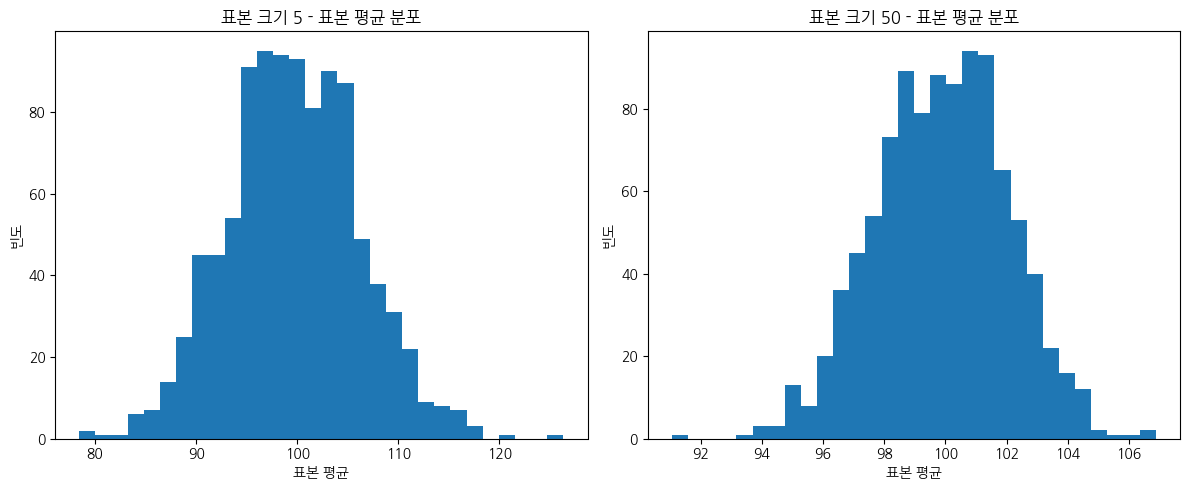

In [22]:
# 모집단 생성
np.random.seed(2025)
population = np.random.normal(100, 15, 100000)

# 표본 크기 5인 경우 표본 평균 1000번 계산
sample_means_5 = [np.mean(np.random.choice(population, 5)) for _ in range(1000)]

# 표본 크기 50인 경우 표본 평균 1000번 계산
sample_means_50 = [np.mean(np.random.choice(population, 50)) for _ in range(1000)]

# 히스토그램 비교
plt.figure(figsize=(12,5))

# n = 5
plt.subplot(1, 2, 1)
plt.hist(sample_means_5, bins=30)
plt.title("표본 크기 5 - 표본 평균 분포")
plt.xlabel("표본 평균")
plt.ylabel("빈도")

# n = 50
plt.subplot(1, 2, 2)
plt.hist(sample_means_50, bins=30)
plt.title("표본 크기 50 - 표본 평균 분포")
plt.xlabel("표본 평균")
plt.ylabel("빈도")

plt.tight_layout()
plt.show()


1. 표본 크기가 다를 때 표본 평균 분포는 어떻게 달라졌나요?

> 표본 크기 5일 때는 분포가 퍼져 있고 변동이 크다.
> 표본 크기 50일 때는 분포가 더 좁고 평균 주변에 밀집된다.

2. 왜 표본 크기가 중요할까요?

> 표본이 클수록 평균의 안정성이 높아지고, 변동성이 줄어들기 때문이다.
> 표본 크기가 커지면 표본 평균이 모집단 평균에 더 가까워진다

3. 이 개념은 실제로 어디에 활용될 수 있을까요?

> 여론조사에서 필요한 표본 수 결정
> 제품 품질 검사에서 평균 품질 측정
> 금융 데이터 분석에서 위험 측정

**문제 11. 단순 선형 회귀 분석**

In [23]:
# 데이터 생성
from sklearn.linear_model import LinearRegression

np.random.seed(505)
study_time = np.random.normal(5, 2, 100)
score = 50 + study_time * 8 + np.random.normal(0, 5, 100)
df11 = pd.DataFrame({'study_time': study_time, 'score': score})

기울기(계수): 7.9093085705341615
절편: 51.60572827982272


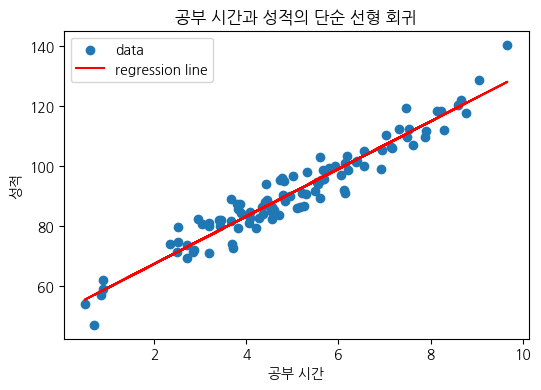

In [25]:
# 회귀 분석 준비
X = df11[['study_time']]
y = df11['score']

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 계수와 절편 출력
print("기울기(계수):", model.coef_[0])
print("절편:", model.intercept_)

# 회귀선 시각화
plt.figure(figsize=(6,4))
plt.scatter(df11['study_time'], df11['score'], label='data')

# 회귀선
pred_line = model.predict(X)
plt.plot(df11['study_time'], pred_line, color='red', label='regression line')

plt.xlabel("공부 시간")
plt.ylabel("성적")
plt.title("공부 시간과 성적의 단순 선형 회귀")
plt.legend()
plt.show()



공부 시간이 성적에 어떤 영향을 주었나요?

> 공부 시간이 증가할수록 성적이 상승하는 양의 선형 관계가 나타난다.
> 회귀 계수(기울기)가 양수이므로 공부 시간이 성적을 높이는 방향으로 작용한다.

회귀선은 데이터를 잘 설명하고 있나요?

> 점들이 회귀선 주변에 비교적 밀집되어 있어 설명력이 좋은 편이다.
> 오차가 있지만 전반적인 패턴은 잘 포착한다.

이 회귀식을 현실에 적용할 수 있을까요?

> 일반적인 경향은 설명할 수 있지만 그대로 예측에 사용하기에는 한계가 있다.
> 성적은 공부 시간 외에도 다양한 요인(수면, 강의 질, 학습 방법 등)의 영향을 받기 때문이다.

선형 회귀분석은 언제 활용할 수 있을까요?

> 변수 간의 선형적 관계를 파악하고 싶을 때
> 한 변수의 변화가 다른 변수에 미치는 영향을 정량적으로 알고 싶을 때
> 예측 모델의 기초 분석으로 사용할 때


**문제 12. A/B 테스트 해석**

In [26]:
# 데이터 생성
np.random.seed(606)
group_a = np.random.binomial(1, 0.12, 1000)
group_b = np.random.binomial(1, 0.15, 1000)

A그룹 전환율: 0.131
B그룹 전환율: 0.133
전환율 차이 (B - A): 0.0020000000000000018


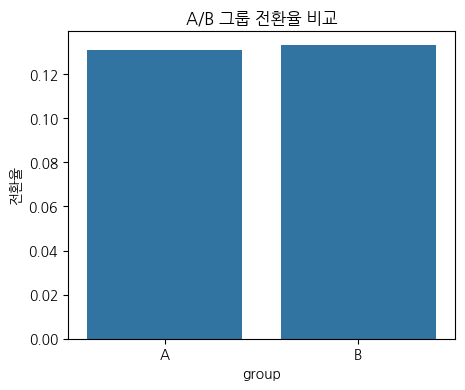

In [28]:
# 1. 전환율 계산
conv_a = group_a.mean()
conv_b = group_b.mean()

print("A그룹 전환율:", conv_a)
print("B그룹 전환율:", conv_b)
print("전환율 차이 (B - A):", conv_b - conv_a)

# 2. 두 그룹 전환율 비교 시각화
df_conv = pd.DataFrame({
    'group': ['A', 'B'],
    'conversion_rate': [conv_a, conv_b]
})

plt.figure(figsize=(5,4))
sns.barplot(data=df_conv, x='group', y='conversion_rate')
plt.title("A/B 그룹 전환율 비교")
plt.ylabel("전환율")
plt.show()



1. 두 그룹의 전환율 차이는 얼마나 되나요?

> B그룹 전환율이 A그룹보다 약 0.03(3%p) 정도 높다.

2. 차이가 '의미 있다'는 건 무엇을 뜻하나요?

> 우연한 변동이 아니라, 실제로 B그룹이 더 높은 전환을 만들어냈다는 통계적 근거가 있을 때를 말한다.
> 즉, 반복해도 비슷한 차이가 날 가능성이 높다는 뜻.

3. 이 실험 결과로 어떤 결정을 내릴 수 있을까요?

> B그룹이 더 성과가 좋다면 해당 버튼·디자인·문구 등을 실제 서비스에 적용할 수 있다.

4. A/B 테스트는 현실에서 어떻게 쓰일까요?

> 웹/앱 UI 개선, 광고 카피 테스트, 가격 비교, 추천 시스템 변경 효과 검증, 이메일 제목 실험 등
> 실제 사용자 반응을 기반으로 더 나은 버전을 선택할 때 널리 사용된다.

